# 01 Esempio stampa scatter casuale

In [1]:
#%matplotlib inline # magic function that renders the figure in a notebook (sometime deprecated)

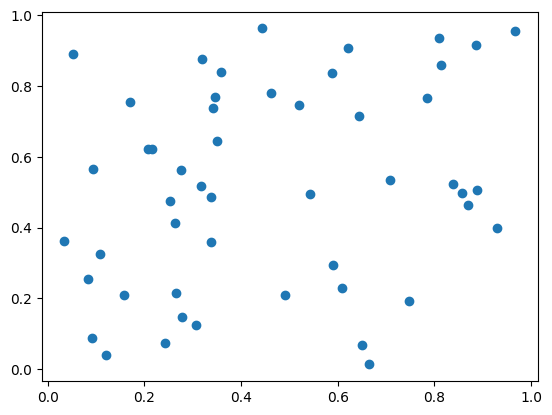

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import rand
x = rand(50)
y = rand(50)
plt.scatter(x,y); # ; avoid plot function <>
plt.show()

# 02 plot line graph

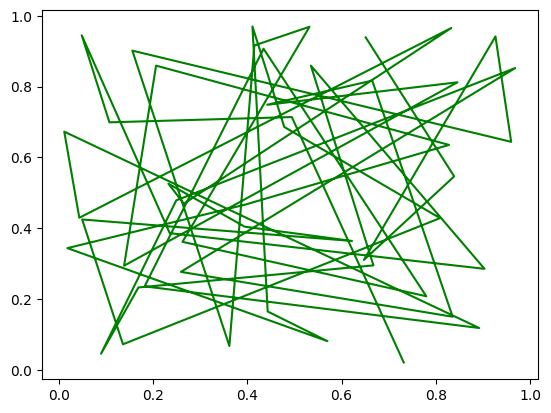

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import rand
x = rand(50)
y = rand(50)
plt.plot(x,y,color='green'); # ; avoid plot function <> is like plt.show()
plt.show()

# 03 add plot detail and legend

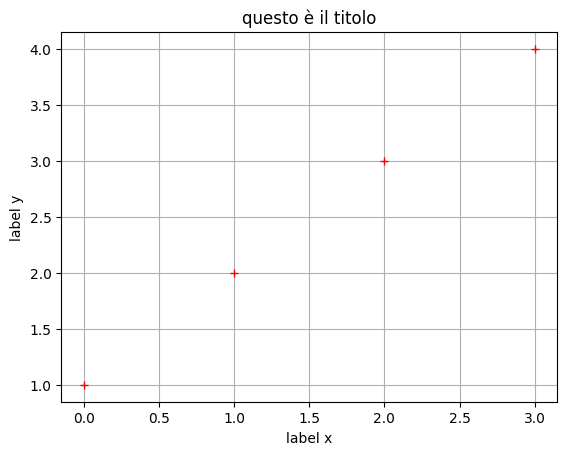

In [4]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4],'+r')  #
plt.ylabel('label y');
plt.xlabel('label x');
plt.grid()
plt.title('questo è il titolo') ;
plt.show()

# 04 Clean Graph

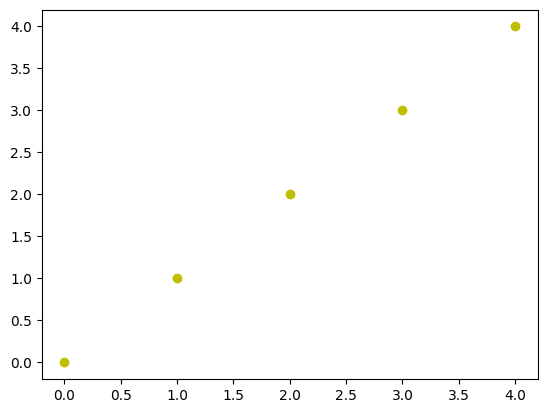

In [5]:
import matplotlib.pyplot as plt

x = [0,1, 2, 3, 4]
y = [0,1, 2, 3, 4]
 # h, y must have same len 
plt.plot(x , y ,'oy') # not ; we have show # oy big yellow point
plt.show()

# 05 different colors and linear implicit y

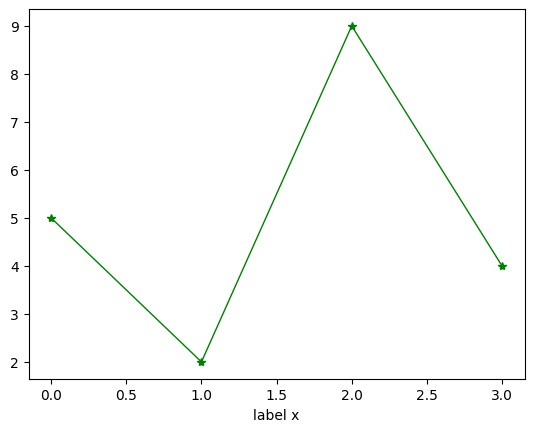

In [6]:
import matplotlib.pyplot as plt

plt.plot([5, 2, 9, 4], marker='*', linewidth=1,color='green')  #
plt.xlabel('label x'); # with ;
#plt.show()

# 06 in place plot

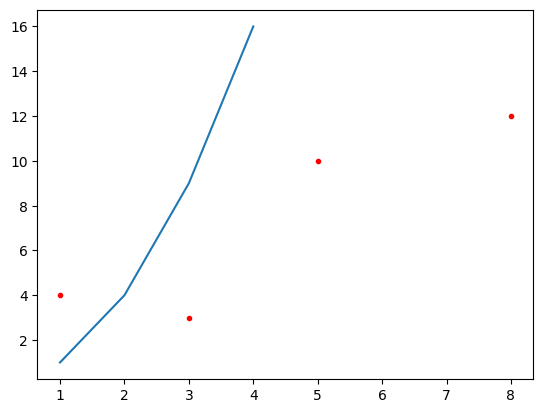

In [7]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [1, 4, 9, 16],); # line
plt.plot([1,3,5,8], [4, 3, 10, 12],'.r'); # point

plt.show()

# 07 quadratic 

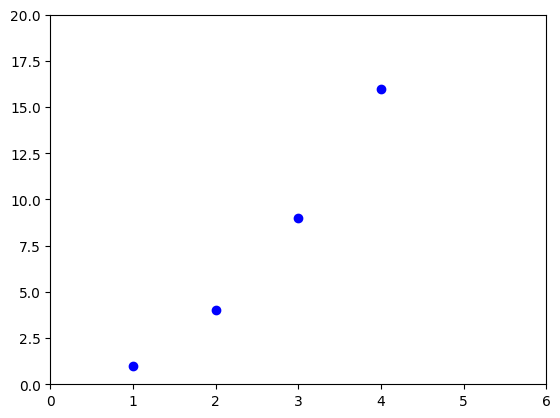

In [8]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [1, 4, 9, 16],'ob')
plt.axis([0, 6, 0, 20]);
plt.show()

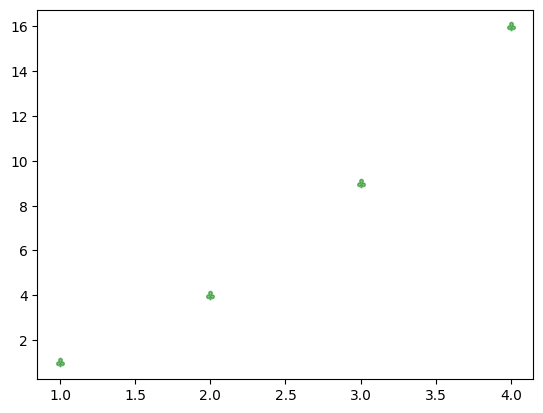

In [9]:
import matplotlib.pyplot as plt

plt.scatter([1, 2, 3, 4], [1, 4, 9, 16],c="g", alpha=0.5, marker=r'$\clubsuit$',label="Luck");
plt.show()

# 08 sqrt

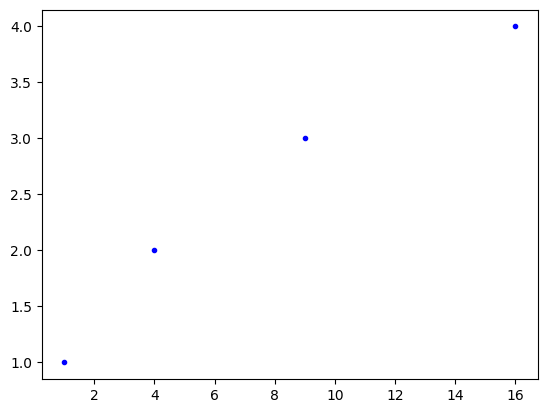

In [14]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [1, 4, 9, 16]

plt.plot(y, x,'.b')
plt.show()

# 09 exponential

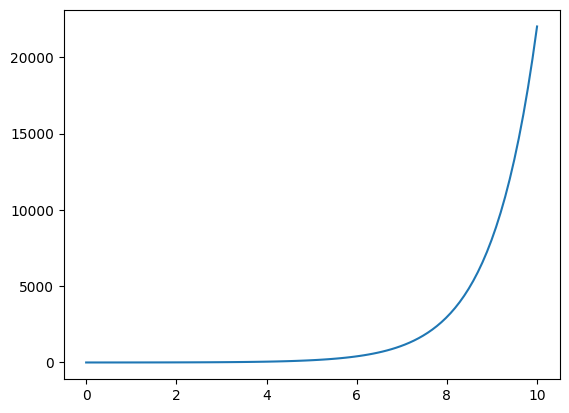

In [11]:
import numpy as np 

x = np.linspace(0,10,100)
y = np.exp(x)


plt.plot(x,y);
plt.show()

# 10 Log

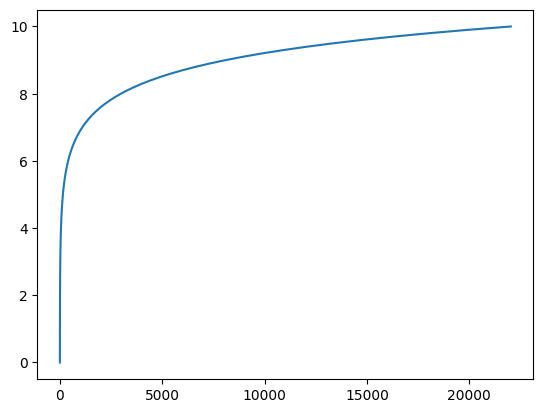

In [12]:
import numpy as np 

x = np.linspace(0,10,100)
y = np.exp(x)


plt.plot(y,x);
plt.show()

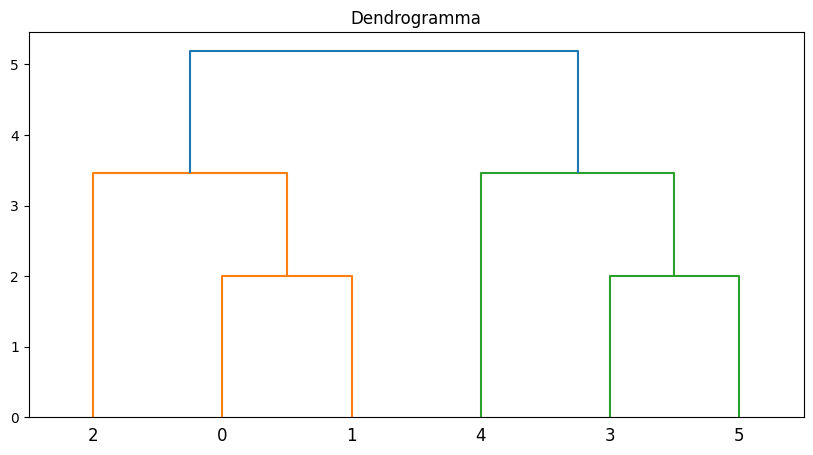

In [16]:
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])


Z = sch.linkage(X, method='ward')

plt.figure(figsize=(10, 5))
sch.dendrogram(Z)
plt.title("Dendrogramma")
plt.show()